# Clustering

### Clustering is about grouping data together.  
* Each data point gets put into a specific category based upon it's features and the features of the other data points.  

### Common uses of unsupervised learning
* Clustering
* Association

![title](./images/Clustering_01.JPG)
Image from https://aws.amazon.com/blogs/machine-learning/k-means-clustering-with-amazon-sagemaker/

# K-means clustering

* Unsupervised method to classify data
* Select K number of random points to use as cluster centers called centroids. In this image, the blue and red squares are the centroids. There are 2 centroids, so K=2.
![title](./images/K-means_01.JPG)

* Calculate the distance for each data point to the closest centroid and assign the point to that cluster. 
![title](./images/K-means_02.JPG)

* Calculate where the new cluster center should be by computing the average of the distance for each assigned point to the centroid.
![title](./images/K-means_03.JPG)

* Keep repeating these steps until none of the cluster assignments change.
![title](./images/K-means_04.JPG)
Images from https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [1]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn import datasets, neighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


### Import the Iris dataset

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Print the class names 
print("The class names are:")
print(iris.target_names)

# Print the feature names
print("\nThe feature names are:")
print(iris.feature_names)
print("\n")

# Define features and target
# X will be the Sepal length and width
X = iris.data[:, :2]
# y is the type of flower
y = iris.target


The class names are:
['setosa' 'versicolor' 'virginica']

The feature names are:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




### Plot the Iris data.  The data is labeled.  Each color in the scatterplot represents a different class.

Text(0.5, 1.0, 'Sepal Length vs Sepal Width per Category')

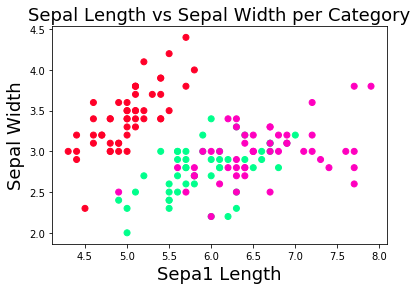

In [3]:
# Plot the data

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.title('Sepal Length vs Sepal Width per Category', fontsize=18)



### Use the Elbow Method to determine optimal number of centroids (value of K)

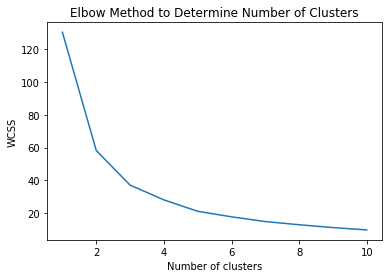

In [4]:
# Create a list to hold the Within Cluster Sum of Squares
wcss = []
# Test values of K from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    # Inertia is the sum of the squared distances to their closest cluster center
    wcss.append(kmeans.inertia_)

# Create Elbow plot showing values of interia at each value of K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to Determine Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Initiate K-means and fit the data.  It's not really training since the data is not "officially" labeled.
* Display the centers that are found
* Display how the first 5 items were classified.
* We are using K = 3 (n_clusters) since we know there are 3 classes

In [5]:
# Initiate KMeans
km = KMeans(n_clusters = 4, random_state=21)
# Fit the model
km.fit(X)

#Display the centers
centers = km.cluster_centers_
print("The centers for the centroids are:")
print(centers)
print("\n")

# Display the classification for some items

for i in range(5):
    print("Item " + str(i) + " with sepal length " + str(X[i,0]) + " and sepal width " + str(X[i,1]) + 
          " was classified in class " + str(km.labels_[i]) + ".")



The centers for the centroids are:
[[5.90980392 2.73529412]
 [5.1875     3.6375    ]
 [6.85348837 3.1       ]
 [4.76666667 2.89166667]]


Item 0 with sepal length 5.1 and sepal width 3.5 was classified in class 1.
Item 1 with sepal length 4.9 and sepal width 3.0 was classified in class 3.
Item 2 with sepal length 4.7 and sepal width 3.2 was classified in class 3.
Item 3 with sepal length 4.6 and sepal width 3.1 was classified in class 3.
Item 4 with sepal length 5.0 and sepal width 3.6 was classified in class 1.


### Plot the color coded classification data from above versus the predicted classifications.

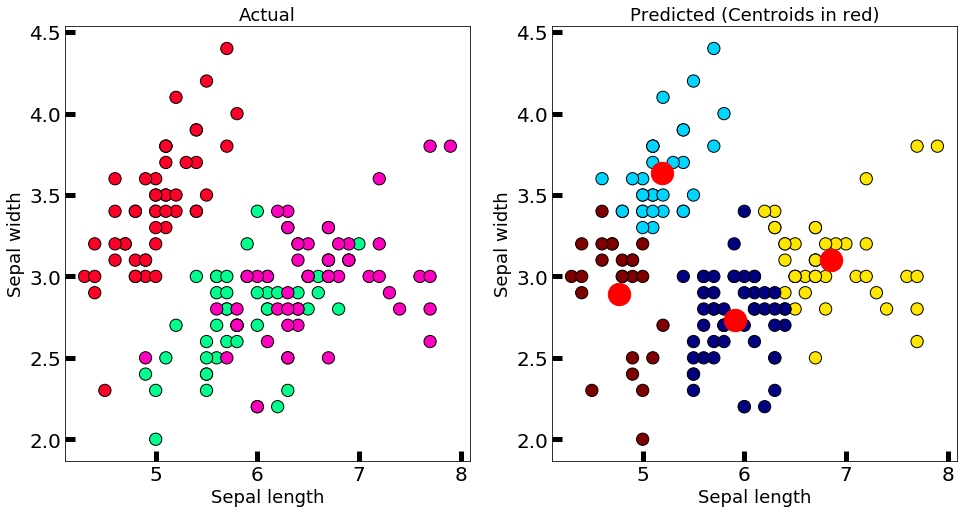

In [6]:
# this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted (Centroids in red)', fontsize=18)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=500, c='red')


# Phylogenetic Trees

### Phylogenetic trees are used to cluster  based on evolutionary relationships.  This is typically done with DNA or protein sequences.

### Example of a protein alignment

![title](./images/Protein_Align_01.JPG)

### A phylogenetic tree can be made from a sequnce alignment.

![title](./images/Phylo_01.JPG)

### Let's create an alignment of protein sequences from the SARS-CoV-2 virus surface glycoprotein (S) region using Clustal Omega.

https://www.ebi.ac.uk/Tools/msa/clustalo/

Credits
* https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
* https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
* https://linkinghub.elsevier.com/retrieve/pii/S1286-4579(20)30049-6

